In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "gHLqjBEtV9FwPEYoPY7reAyvL"
consumer_secret = "gMAfuuI13GCSKGZxO3PF9ZR5sDFTghq44Uuw3Ece5hs9OTSC9z"
access_token = "977543336377581568-xnRHASGqgdszCGzvHgYquWL2hjkEXZS"
access_token_secret = "ZYZz0sorPDL3tuafQWCEDWIDAn4uqi0c8gszGq7HefTLS"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
sentiments = []
target_list = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes"]

In [13]:
for user in target_list:
    counter = 1
    for page in range(5):
        tweets = api.user_timeline(user,page=page+1)
        for tweet in tweets:
            com = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            sentiments.append({"Date": tweet["created_at"],
                               "User": user,
                               "Text": tweet["text"],
                               "Compound": com,
                               "Positive": pos,
                               "Neutral": neu,
                               "Negative": neg,
                               "Tweets Ago": counter})
            counter = counter + 1

In [14]:
sent_df = pd.DataFrame.from_dict(sentiments)
sent_df = sent_df[["User","Date","Tweets Ago","Compound","Positive","Neutral","Negative","Text"]]
sent_df.to_csv("output.csv")
sent_df

,User,Date,Tweets Ago,Compound,Positive,Neutral,Negative,Text
0,@BBC,Sat Mar 31 16:15:07 +0000 2018,1,0.0000,0.000,1.000,0.000,Easter music and readings from the Chapel of @...
1,@BBC,Sat Mar 31 15:43:37 +0000 2018,2,0.0000,0.000,1.000,0.000,RT @bbcthree: Someone's knitting cosy Easter p...
2,@BBC,Sat Mar 31 15:42:42 +0000 2018,3,0.7650,0.337,0.663,0.000,RT @BBCRadio3: Get ready to luxuriate in the s...
3,@BBC,Sat Mar 31 15:42:08 +0000 2018,4,-0.3612,0.000,0.857,0.143,RT @BBCLookEast: Here's the moment Stephen Haw...
4,@BBC,Sat Mar 31 13:01:05 +0000 2018,5,0.1280,0.185,0.662,0.152,😂 True or false? \n@NiallOfficial screamed whe...
5,@BBC,Sat Mar 31 12:31:02 +0000 2018,6,0.0000,0.000,1.000,0.000,This is what happens when you get an OWL to de...
6,@BBC,Sat Mar 31 11:50:05 +0000 2018,7,-0.3404,0.000,0.821,0.179,✊ Don't like plastic in the supermarkets? \nWh...
7,@BBC,Sat Mar 31 11:28:03 +0000 2018,8,0.1779,0.362,0.638,0.000,It's still growing 😱 https://t.co/T5YocDauYj
8,@BBC,Sat Mar 31 11:26:30 +0000 2018,9,-0.6351,0.000,0.820,0.180,RT @BBCArchive: Eh-oh! #OnThisDay 1997 the Tel...
9,@BBC,Sat Mar 31 10:37:23 +0000 2018,10,0.7579,0.255,0.745,0.000,RT @bbcgetinspired: BBC Get Inspired has teame...


In [15]:
BBC_df = sent_df.groupby(["User"]).get_group("@BBC")
CBS_df = sent_df.groupby(["User"]).get_group("@CBS")
CNN_df = sent_df.groupby(["User"]).get_group("@CNN")
FOX_df = sent_df.groupby(["User"]).get_group("@FoxNews")
NYT_df = sent_df.groupby(["User"]).get_group("@NYTimes")

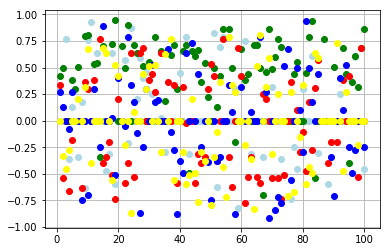

In [16]:
plt.plot(BBC_df["Tweets Ago"],BBC_df["Compound"],marker="o",linewidth=0,color="lightblue")
plt.plot(CBS_df["Tweets Ago"],CBS_df["Compound"],marker="o",linewidth=0,color="green")
plt.plot(CNN_df["Tweets Ago"],CNN_df["Compound"],marker="o",linewidth=0,color="red")
plt.plot(FOX_df["Tweets Ago"],FOX_df["Compound"],marker="o",linewidth=0,color="blue")
plt.plot(NYT_df["Tweets Ago"],NYT_df["Compound"],marker="o",linewidth=0,color="yellow")
plt.grid()
plt.show()
#add legend and labels etc